In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [2]:
shopeeDf = pd.read_csv("/kaggle/input/datageniusdataset/ShopeeData.csv")
shopeeDf.head()

,itemid,shopid,liked_count,cmt_count,discount,shop_location,shop_rating,name,historical_sold,price,rating_star,rating_count,rcount_with_context,status,Date
0,20030969576,18363975,25677,9675,11%,HÃ Ná»™i,4.931227,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35701,9.200000e+09,4.906667,9675,5639,normal,3/10/2024
1,19527695224,18363975,20032,6504,40%,HÃ Ná»™i,4.931227,NÆ°á»›c Táº©y Trang L'Oreal Paris 3in1 Micella...,23141,6.600000e+09,4.922202,6504,4034,normal,3/10/2024
2,21407947288,18363975,18760,2611,4%,HÃ Ná»™i,4.931227,NÆ°á»›c Hoa Há»“ng CÃ¢n Báº±ng Da Simple Sooth...,8489,1.150000e+10,4.932976,2611,1441,normal,3/10/2024
3,14185378989,18363975,14582,8600,47%,HÃ Ná»™i,4.931225,NÆ°á»›c Táº©y Trang Simple Micellar Cleansing ...,28022,7.900000e+09,4.922916,8602,5430,normal,3/10/2024
4,10001549800,18363975,29919,19065,22%,HÃ Ná»™i,4.931228,Sá»¯a Rá»­a Máº·t SVR Cho Da Dáº§u Má»¥n - SVR...,69948,1.090000e+10,4.915548,19068,10715,normal,3/10/2024


In [3]:
# How many % of missing values do we have for each feature?
missing_percentage = shopeeDf.isnull().sum() / shopeeDf.shape[0] * 100
missing_percentage

itemid                 0.000000
shopid                 0.000000
liked_count            0.000000
cmt_count              0.000000
discount               0.646496
shop_location          0.000000
shop_rating            0.000000
name                   0.000000
historical_sold        0.000000
price                  0.000000
rating_star            0.000000
rating_count           0.000000
rcount_with_context    0.000000
status                 0.000000
Date                   0.000000
dtype: float64

### Fill missing value in discount column

In [4]:
shopeeDf['discount'] = shopeeDf['discount'].fillna('0%')

In [5]:
# How many % of missing values do we have for each feature?
missing_percentage = shopeeDf.isnull().sum() / shopeeDf.shape[0] * 100
missing_percentage

itemid                 0.0
shopid                 0.0
liked_count            0.0
cmt_count              0.0
discount               0.0
shop_location          0.0
shop_rating            0.0
name                   0.0
historical_sold        0.0
price                  0.0
rating_star            0.0
rating_count           0.0
rcount_with_context    0.0
status                 0.0
Date                   0.0
dtype: float64

### Remove some feature not useful

In [6]:
df = shopeeDf.copy()
print("Columns has a 100% duplicate rate: ")
for column in df.columns:
    unique_values = df[column].nunique()
    if unique_values == 1:
        print(column)

Columns has a 100% duplicate rate: 
shopid
shop_location
status


In [7]:
shopeeDf = shopeeDf.drop(['shopid', 'shop_location', 'name','rating_star','status'], axis=1)
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
0,20030969576,25677,9675,11%,4.931227,35701,9.200000e+09,9675,5639,3/10/2024
1,19527695224,20032,6504,40%,4.931227,23141,6.600000e+09,6504,4034,3/10/2024
2,21407947288,18760,2611,4%,4.931227,8489,1.150000e+10,2611,1441,3/10/2024
3,14185378989,14582,8600,47%,4.931225,28022,7.900000e+09,8602,5430,3/10/2024
4,10001549800,29919,19065,22%,4.931228,69948,1.090000e+10,19068,10715,3/10/2024
...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,17%,4.931019,7,9.990000e+10,2,1,3/31/2024
3863,23130014016,3,2,14%,4.931023,8,3.390000e+10,2,1,3/31/2024
3864,22884871515,1,0,10%,4.931019,2,2.385000e+10,0,0,3/31/2024
3865,22262533851,1,0,15%,4.931018,1,6.500000e+10,0,0,3/31/2024


In [8]:
shopeeDf['Date'] = pd.to_datetime(shopeeDf['Date'])
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
0,20030969576,25677,9675,11%,4.931227,35701,9.200000e+09,9675,5639,2024-03-10
1,19527695224,20032,6504,40%,4.931227,23141,6.600000e+09,6504,4034,2024-03-10
2,21407947288,18760,2611,4%,4.931227,8489,1.150000e+10,2611,1441,2024-03-10
3,14185378989,14582,8600,47%,4.931225,28022,7.900000e+09,8602,5430,2024-03-10
4,10001549800,29919,19065,22%,4.931228,69948,1.090000e+10,19068,10715,2024-03-10
...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,17%,4.931019,7,9.990000e+10,2,1,2024-03-31
3863,23130014016,3,2,14%,4.931023,8,3.390000e+10,2,1,2024-03-31
3864,22884871515,1,0,10%,4.931019,2,2.385000e+10,0,0,2024-03-31
3865,22262533851,1,0,15%,4.931018,1,6.500000e+10,0,0,2024-03-31


In [9]:
print('Min date from data set: %s' % shopeeDf['Date'].min())
print('Max date from data set: %s' % shopeeDf['Date'].max())

Min date from data set: 2024-03-10 00:00:00
Max date from data set: 2024-03-31 00:00:00


### Dataset with 3 week period (10/03/2024 - 31/03/2024) => The amount of data is quite small, so using machine learning methods is suitable.

### Overview of the distribution of data

In [10]:
shopeeDf.describe()

,itemid,liked_count,cmt_count,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
count,3.867000e+03,3867.000000,3867.000000,3867.000000,3867.000000,3.867000e+03,3867.000000,3867.000000,3867
mean,1.466942e+10,12234.599948,2032.896302,4.931021,7035.889061,2.451592e+10,2032.798293,1210.578485,2024-03-20 16:10:47.944142592
min,1.985670e+09,0.000000,0.000000,4.930905,0.000000,9.000000e+08,0.000000,0.000000,2024-03-10 00:00:00
25%,5.481377e+09,130.000000,55.000000,4.930969,225.000000,1.125000e+10,55.000000,25.000000,2024-03-15 00:00:00
50%,1.823627e+10,16565.000000,198.000000,4.931027,673.000000,2.050000e+10,198.000000,107.000000,2024-03-21 00:00:00
75%,2.215632e+10,18615.500000,909.500000,4.931054,3643.500000,3.490000e+10,909.500000,494.000000,2024-03-26 00:00:00
max,2.591996e+10,71117.000000,106400.000000,4.931238,322223.000000,1.199000e+11,106413.000000,64046.000000,2024-03-31 00:00:00
std,8.170483e+09,10035.877379,8781.247212,0.000066,27425.013404,1.760156e+10,8782.279788,5334.233921,NaN


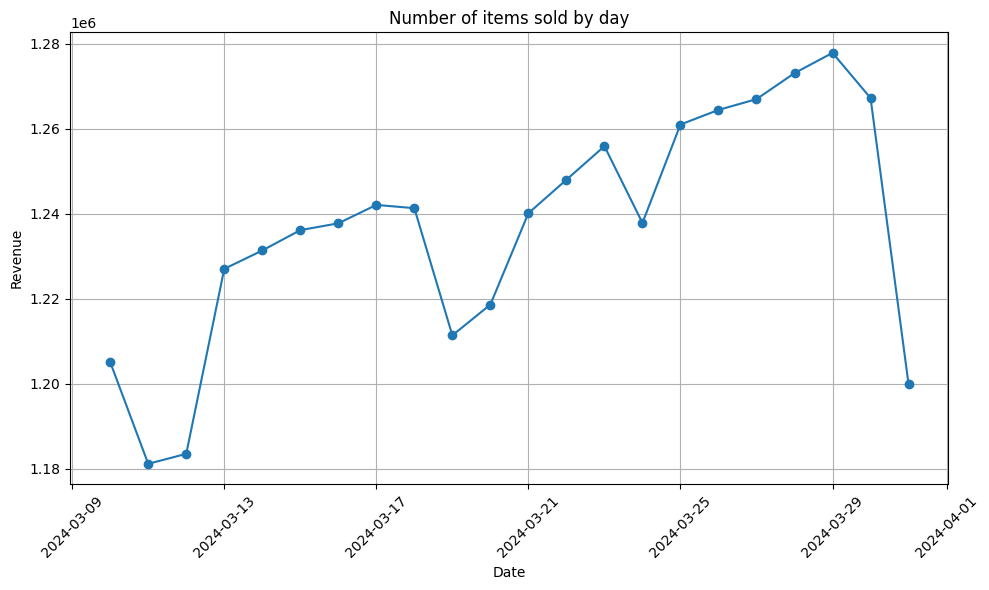

In [22]:
grouped_df = shopeeDf.groupby('Date')['historical_sold'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Date'], grouped_df['historical_sold'], marker='o', linestyle='-')
plt.title('Number of items sold by day')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The last days of the month such as 25 - 27 Shopee often have discounts, so number of items sold by day increase on these days, and the beginning of the month is less

## Top 5 Most Sold Items and Top 5 Least Sold Items

In [11]:
grouped = shopeeDf.groupby('itemid')['historical_sold'].sum()
top_5_product = grouped.sort_values(ascending=False).head(5)
top_5_items = top_5_product.index.tolist()
top_5_quantity = [grouped.loc[i] for i in top_5_items]
top_5_price = [shopeeDf.loc[shopeeDf['itemid'] == i, 'price'].iloc[0] for i in top_5_items]
data = {
    'items': top_5_items,
    'quantity': top_5_quantity,
    'price': top_5_price
}

top5_highest_sold = pd.DataFrame(data)
top5_highest_sold
# bottom_5_items = grouped.sort_values().head(5)

,items,quantity,price
0,2421653980,7043524,9.500000e+09
1,5451541710,2724989,1.270000e+10
2,10001549800,1576811,1.090000e+10
3,23232932577,1318263,6.790000e+09
4,16870222597,1140525,4.200000e+09


In [12]:
grouped = shopeeDf.groupby('itemid')['historical_sold'].sum()
bottom_5_product = grouped.sort_values().head(5)
bottom_5_items = bottom_5_product.index.tolist()
bottom_5_quantity = [grouped.loc[i] for i in bottom_5_items]
bottom_5_price = [shopeeDf.loc[shopeeDf['itemid'] == i, 'price'].iloc[0] for i in bottom_5_items]
data = {
    'items': bottom_5_items,
    'quantity': bottom_5_quantity,
    'price': bottom_5_price
}

top_5least_sold_item = pd.DataFrame(data)
top_5least_sold_item
# bottom_5_items = grouped.sort_values().head(5)

,items,quantity,price
0,25919955014,0,6.500000e+10
1,15689885742,0,7.700000e+10
2,24070912680,0,1.990000e+10
3,25617038549,0,5.000000e+10
4,24320863474,0,1.990000e+10


## Adding revenue feature to data frame and Representing Daily revenue

In [13]:
shopeeDf['discount'] = shopeeDf['discount'].apply(lambda x: float(str(x).rstrip('%')) / 100 if isinstance(x, str) else x)
shopeeDf.head()

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date
0,20030969576,25677,9675,0.11,4.931227,35701,9.200000e+09,9675,5639,2024-03-10
1,19527695224,20032,6504,0.40,4.931227,23141,6.600000e+09,6504,4034,2024-03-10
2,21407947288,18760,2611,0.04,4.931227,8489,1.150000e+10,2611,1441,2024-03-10
3,14185378989,14582,8600,0.47,4.931225,28022,7.900000e+09,8602,5430,2024-03-10
4,10001549800,29919,19065,0.22,4.931228,69948,1.090000e+10,19068,10715,2024-03-10


In [14]:
shopeeDf['revenue'] = shopeeDf['historical_sold'] * shopeeDf['price']*(1-shopeeDf['discount'])
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date,revenue
0,20030969576,25677,9675,0.11,4.931227,35701,9.200000e+09,9675,5639,2024-03-10,2.923198e+14
1,19527695224,20032,6504,0.40,4.931227,23141,6.600000e+09,6504,4034,2024-03-10,9.163836e+13
2,21407947288,18760,2611,0.04,4.931227,8489,1.150000e+10,2611,1441,2024-03-10,9.371856e+13
3,14185378989,14582,8600,0.47,4.931225,28022,7.900000e+09,8602,5430,2024-03-10,1.173281e+14
4,10001549800,29919,19065,0.22,4.931228,69948,1.090000e+10,19068,10715,2024-03-10,5.946979e+14
...,...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,0.17,4.931019,7,9.990000e+10,2,1,2024-03-31,5.804190e+11
3863,23130014016,3,2,0.14,4.931023,8,3.390000e+10,2,1,2024-03-31,2.332320e+11
3864,22884871515,1,0,0.10,4.931019,2,2.385000e+10,0,0,2024-03-31,4.293000e+10
3865,22262533851,1,0,0.15,4.931018,1,6.500000e+10,0,0,2024-03-31,5.525000e+10


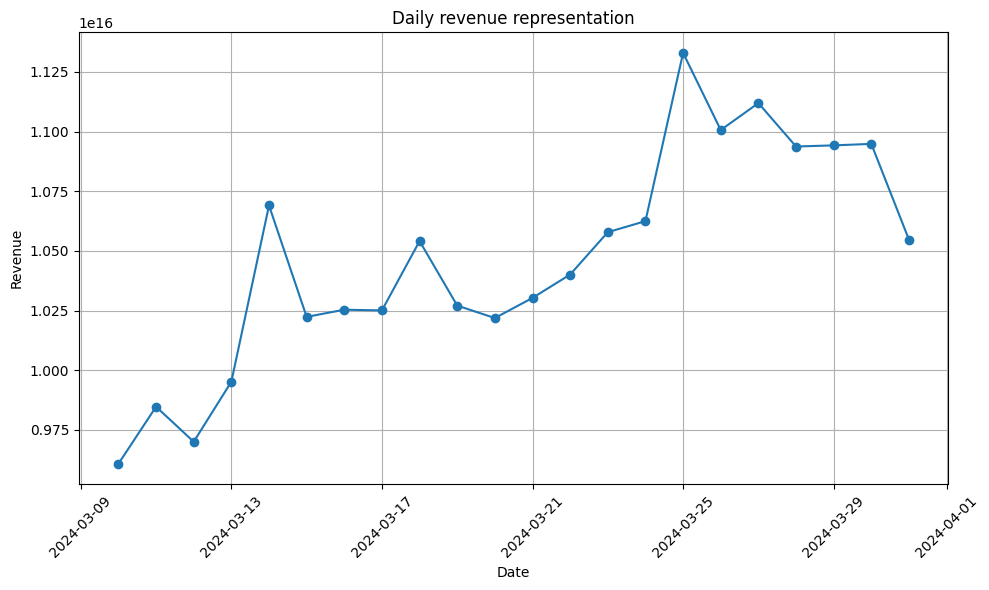

In [15]:
grouped_df = shopeeDf.groupby('Date')['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Date'], grouped_df['revenue'], marker='o', linestyle='-')
plt.title('Daily revenue representation')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

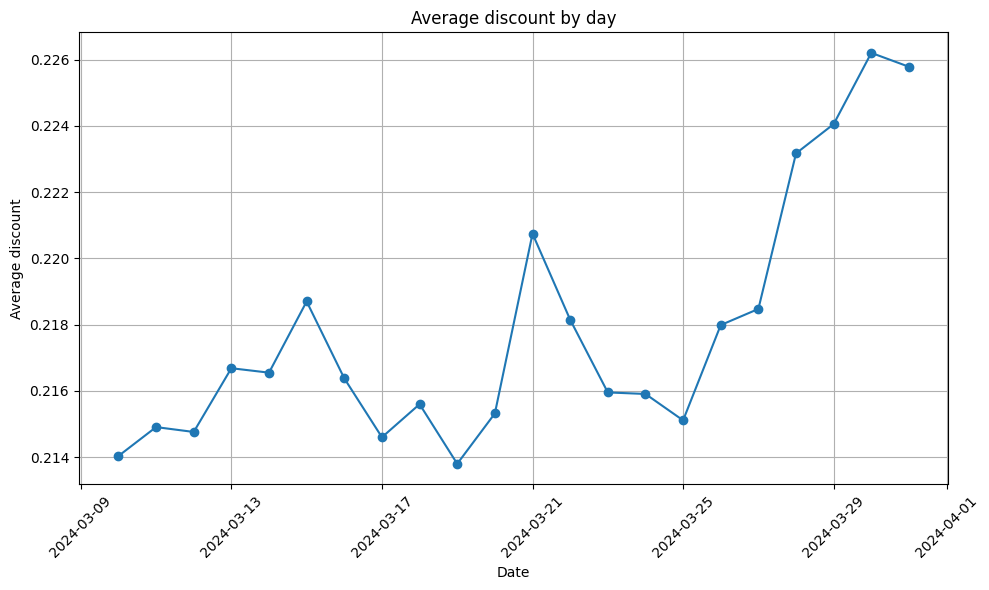

In [18]:
discount_by_date = shopeeDf.groupby('Date')['discount'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(discount_by_date['Date'], discount_by_date['discount'], marker='o', linestyle='-')
plt.title('Average discount by day')
plt.xlabel('Date')
plt.ylabel('Average discount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### => Similarly, at the end of the month there are more discounts than normal days

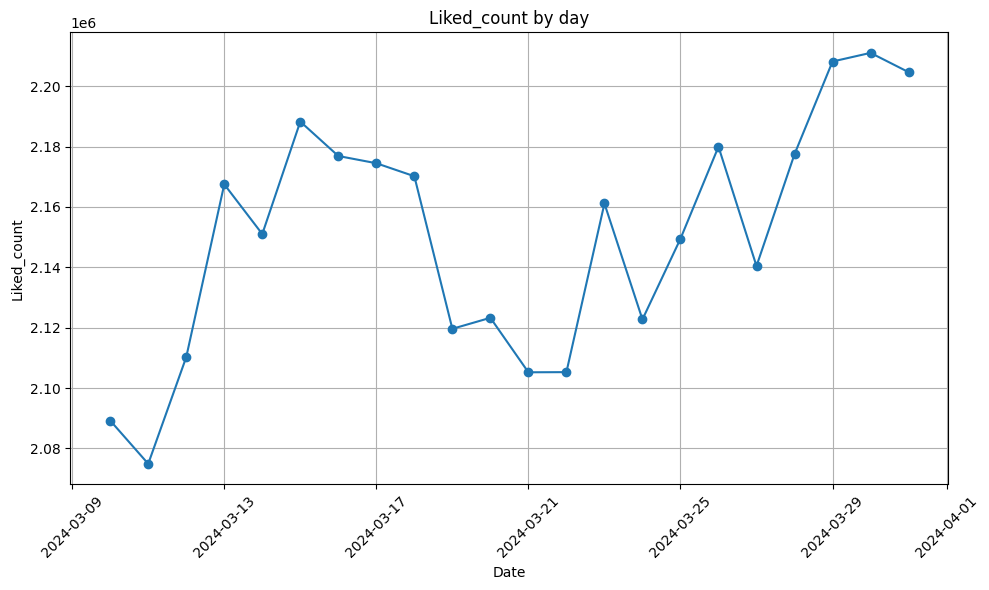

In [20]:
Likedcount_by_date = shopeeDf.groupby('Date')['liked_count'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(Likedcount_by_date['Date'], Likedcount_by_date['liked_count'], marker='o', linestyle='-')
plt.title('Liked_count by day')
plt.xlabel('Date')
plt.ylabel('Liked_count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

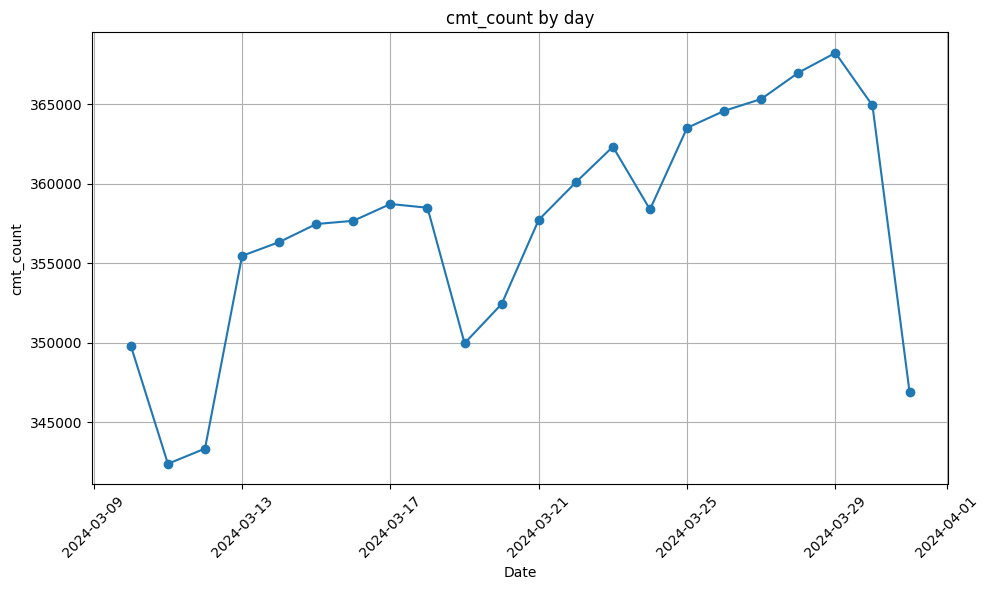

In [21]:
Likedcount_by_date = shopeeDf.groupby('Date')['cmt_count'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(Likedcount_by_date['Date'], Likedcount_by_date['cmt_count'], marker='o', linestyle='-')
plt.title('cmt_count by day')
plt.xlabel('Date')
plt.ylabel('cmt_count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_33/3012738637.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


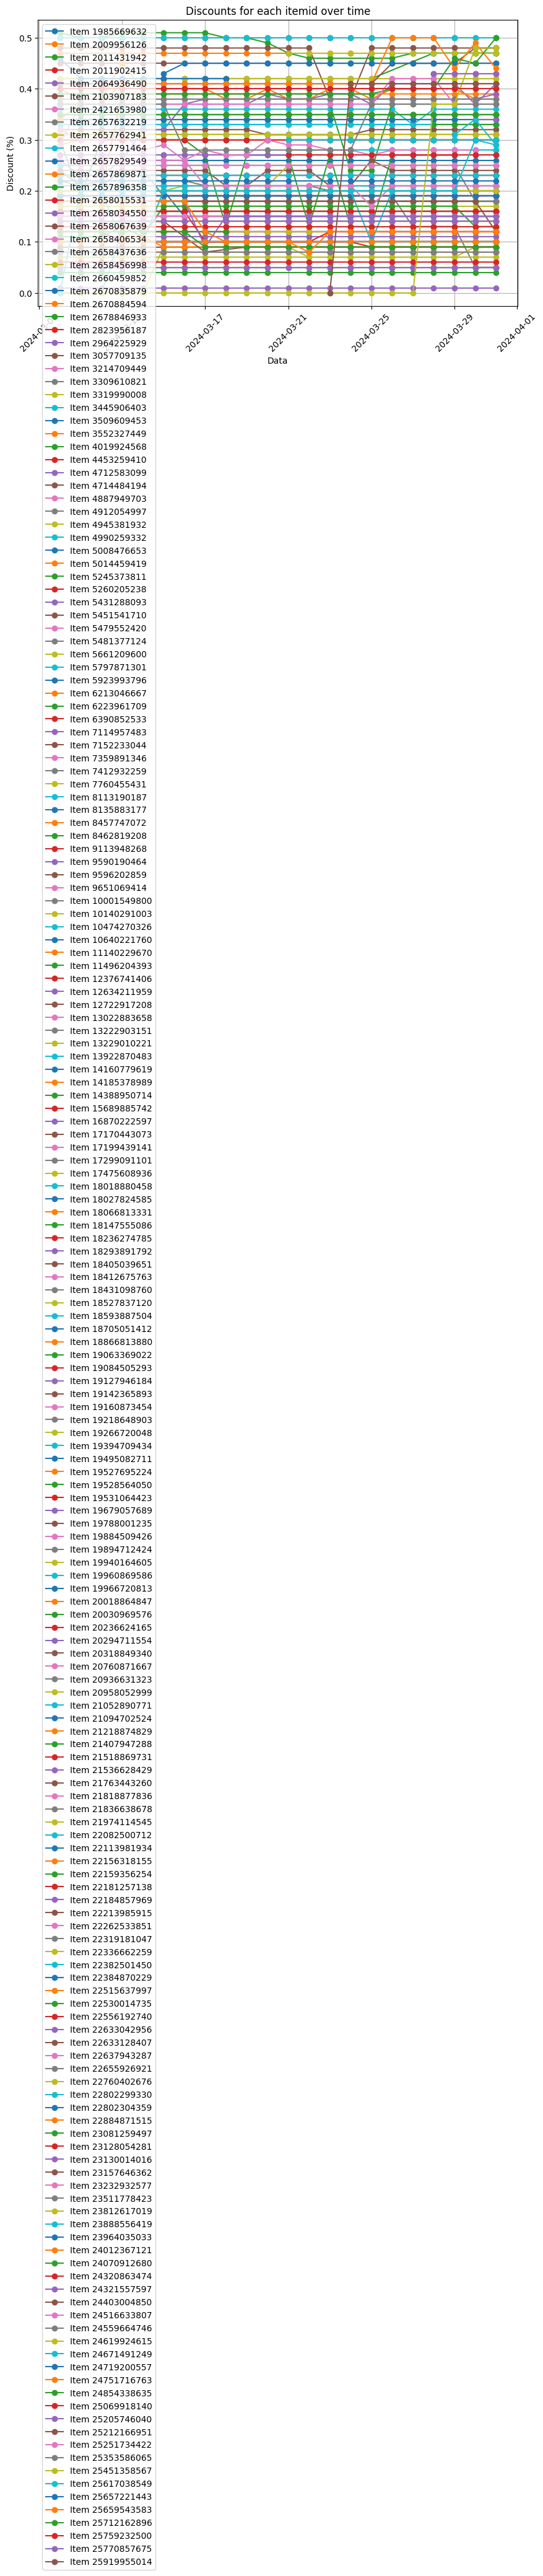

In [17]:
df = shopeeDf.copy()

plt.figure(figsize=(10, 6))
for product_id, group in df.groupby('itemid'):
    plt.plot(group['Date'], group['discount'], marker='o', linestyle='-', label=f'Item {product_id}')

plt.title('Discounts for each itemid over time')
plt.xlabel('Data')
plt.ylabel('Discount (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

### Number of item type corresponding to number of csv_file in review data

In [18]:
len(shopeeDf['itemid'].unique())

196

In [19]:
shopeeDf

,itemid,liked_count,cmt_count,discount,shop_rating,historical_sold,price,rating_count,rcount_with_context,Date,revenue
0,20030969576,25677,9675,0.11,4.931227,35701,9.200000e+09,9675,5639,2024-03-10,2.923198e+14
1,19527695224,20032,6504,0.40,4.931227,23141,6.600000e+09,6504,4034,2024-03-10,9.163836e+13
2,21407947288,18760,2611,0.04,4.931227,8489,1.150000e+10,2611,1441,2024-03-10,9.371856e+13
3,14185378989,14582,8600,0.47,4.931225,28022,7.900000e+09,8602,5430,2024-03-10,1.173281e+14
4,10001549800,29919,19065,0.22,4.931228,69948,1.090000e+10,19068,10715,2024-03-10,5.946979e+14
...,...,...,...,...,...,...,...,...,...,...,...
3862,7760455431,7,2,0.17,4.931019,7,9.990000e+10,2,1,2024-03-31,5.804190e+11
3863,23130014016,3,2,0.14,4.931023,8,3.390000e+10,2,1,2024-03-31,2.332320e+11
3864,22884871515,1,0,0.10,4.931019,2,2.385000e+10,0,0,2024-03-31,4.293000e+10
3865,22262533851,1,0,0.15,4.931018,1,6.500000e+10,0,0,2024-03-31,5.525000e+10


## Using Machine Learning Model for Training 

### 1. Split data to train set, test set and validation set

In [24]:
from sklearn.model_selection import train_test_split

X = shopeeDf.drop(columns=['itemid','price','discount', 'revenue', 'liked_count', 'cmt_count'])
y = shopeeDf['historical_sold']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

print("Size of train set", X_train.shape[0])
print("Size of test set:", X_test.shape[0])
print("Size of validation set:", X_val.shape[0])

Size of train set 2706
Size of test set: 777
Size of validation set: 384


# Processing for Review data

## 1. Read file and ignore empty file

In [ ]:
def read_csv_files_in_folder(folder_path):
    valid_dataframes = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            try:
                df = pd.read_csv(file_path)
                if not df.empty:
                    valid_dataframes.append(df)
            except pd.errors.EmptyDataError:
                print(f"Ignoring file '{file_name}' as it has no columns.")
            except Exception as e:
                print(f"Error reading file '{file_name}':", e)
    combined_df = pd.concat(valid_dataframes, ignore_index=True)
    return combined_df

In [ ]:
folder_path = "/kaggle/input/datageniusdataset/DataGeniusDataset"
data = read_csv_files_in_folder(folder_path)
data

In [ ]:
data = data.dropna(axis=1, how='all')
data

In [ ]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
remove_feature_ls = []
for index, value in missing_percentage.items():
    if value != 0:
        remove_feature_ls.append(index)
        print(index, value)

In [ ]:
data = data.drop(remove_feature_ls, axis=1)
data

In [ ]:
data.head().T

In [ ]:
# Get useful feature
df = data[['orderid', 'itemid', 'cmtid', 'ctime','userid', 'mtime', 'submit_time']]
df

In [ ]:
df.loc[:, 'mtime'] = pd.to_datetime(df['mtime'], unit='s')
df.loc[:, 'ctime'] = pd.to_datetime(df['ctime'], unit='s')
df.loc[:, 'submit_time'] = pd.to_datetime(df['submit_time'], unit='s')
df

In [ ]:
from datetime import datetime
print('Min date from data set: %s' % datetime.fromtimestamp(data['mtime'].min()))
print('Max date from data set: %s' % datetime.fromtimestamp(data['mtime'].max()))